In [205]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline
import pandas as pd
from sklearn.cluster import *
from __future__ import  division

In [206]:
def mawindow(data,n):
    dataout = np.cumsum(data, dtype=float)
    dataout[n:] = dataout[n:] - dataout[:-n]
    return dataout[n - 1:] / n

In [207]:
def threshold(data,N):
    stdev = np.std(data)
    return 3*stdev

In [208]:
def Distance(template,muap):
    template = np.array(template)
    muap= np.array(muap)
    D = np.sum(np.square(muap-template))
    return D       

In [209]:
def checkmuap(muap):
    templates=[]
    what=[]
    templates.append(muap[0])
    what.append(0)
    for i in range(1,len(muap)):
        flag = -1
        #print i
        for j in range(len(templates)):
            #print str(Distance(templates[j],muap[i]))+"between"+str(i)+"and template"+str(j)
            if Distance(templates[j],muap[i])< (12.65**5):
                #print Distance(templates[j],muap[i])
                flag=j
                #what.append(j)
        if flag!= -1:
            #print "no template found in"+ str(i)
            m = np.array(muap[i])
            t = np.array(templates[j])
            V = (m+t)/2
            templates[j]=V
        else:
            templates.append(muap[i])
            #what.append(len(templates)-1)
    return templates            

In [210]:
def movingaverage(data,N,threshold):
    MUPA=[]
    for i in range(len(data)):
        if data[i] > threshold:
            if data[i+21] > threshold and data[i+40]<threshold :
                MUPA.append(data[i:i+40]) 
                i = i+40
            else:
                    MUPA.append(data[i:i+20])
                    i = i+20
    return MUPA        

In [211]:
def finpeak(data,threshold):
    peaks = []
    time =[]
    for i in range(len(data)):
        if data[i]>threshold and data[i]>data[i-1] and data[i]>data[i+1]:
            #if len(time) == 0:
                peaks.append(data[i])
                time.append(i)
                    
    return time,peaks       
            
            

In [212]:
def adjpeaktime(peaks,time):
    adjtime=[]
    adjpeaks=[]
    for i in range(len(time)-1):
        if (time[i+1]-time[i]) <10:
            if peaks[i+1]>peaks[i]:
                adjtime.append(time[i+1])
                adjpeaks.append(peaks[i+1])
            elif peaks[i+1]<peaks[i]:
                    adjtime.append(time[i])
                    adjpeaks.append(peaks[i])
    return adjpeaks,adjtime                

In [213]:
def findR(data,threshold,N):
    arr = (data)-(threshold+5)
    result = [max(arr[i:i+N]) for i in range(0, len(arr), N)]
    
    for j in range (0,len(result)):
        if(result[j]<0):
            result[j]=0
      
    A=[]
    P =[]
    for j in range (0,len(result)):
            if(result[j]!=0):
                B = np.where(arr==result[j])[0]
                A = np.append(A,B)
                P = np.append(P,result[j])
    # A=(A+10)/256
    P = P+threshold
    return  A,P  

In [214]:
def findmuap(A,Y):
    muap=[]
    for i in range(len(A)):
        muap.append(Y[int(A[i]-10):int(A[i]+10)])
    ##it was a bit off center
    muap[0]= Y[int(A[0]-4):int(A[0]+16)] 
    muap[1]= Y[int(A[1]-6):int(A[1]+14)] 
    muap[2]= Y[int(A[2]-4):int(A[2]+16)]
    muap[3]= Y[int(A[3]-3):int(A[3]+17)] 
    muap[4]= Y[int(A[4]-3):int(A[4]+17)]
    muap[5]= Y[int(A[5]-5):int(A[5]+15)]
    muap[7]= Y[int(A[7]-3):int(A[7]+17)] 
    return muap  

In [215]:
Y= np.loadtxt('Data.txt', skiprows=0,unpack=True)
X= np.empty((0))  
for i in range(0,78125):
    X = np.append(X,i) 

In [216]:
z = np.abs(Y)
S = mawindow(z,30)  
#thres = threshold(z[31005:31105],20)
thres = threshold(z[34500:34750],20)
time,peaks=finpeak(S[30000:35000],thres)
muap=findmuap(time,Y[30000:35000])
peaks2,time2=adjpeaktime(peaks,time)
A,P= findR(S[30000:35000],thres,20)
P,A=adjpeaktime(P,A)
A = np.array(A)+30000
print thres      
muap=findmuap(A,Y)
templates= checkmuap(muap)
template0=[]
template1=[]
template2=[]
template0=[A[0],A[4],A[7]]  
template1=[A[1],A[3],A[2]]
template2=[A[5],A[6]]

15.4718499211


In [217]:

#MUPA = movingaverage(S[31000:35000],20,thres)
#print len(MUPA)                                 
tt = np.array(A)
print len(tt)

print template0
pp= np.empty((0))  
for i in range(0,40000):
    pp = np.append(pp,90) 

8
[30691.0, 32578.0, 34092.0]


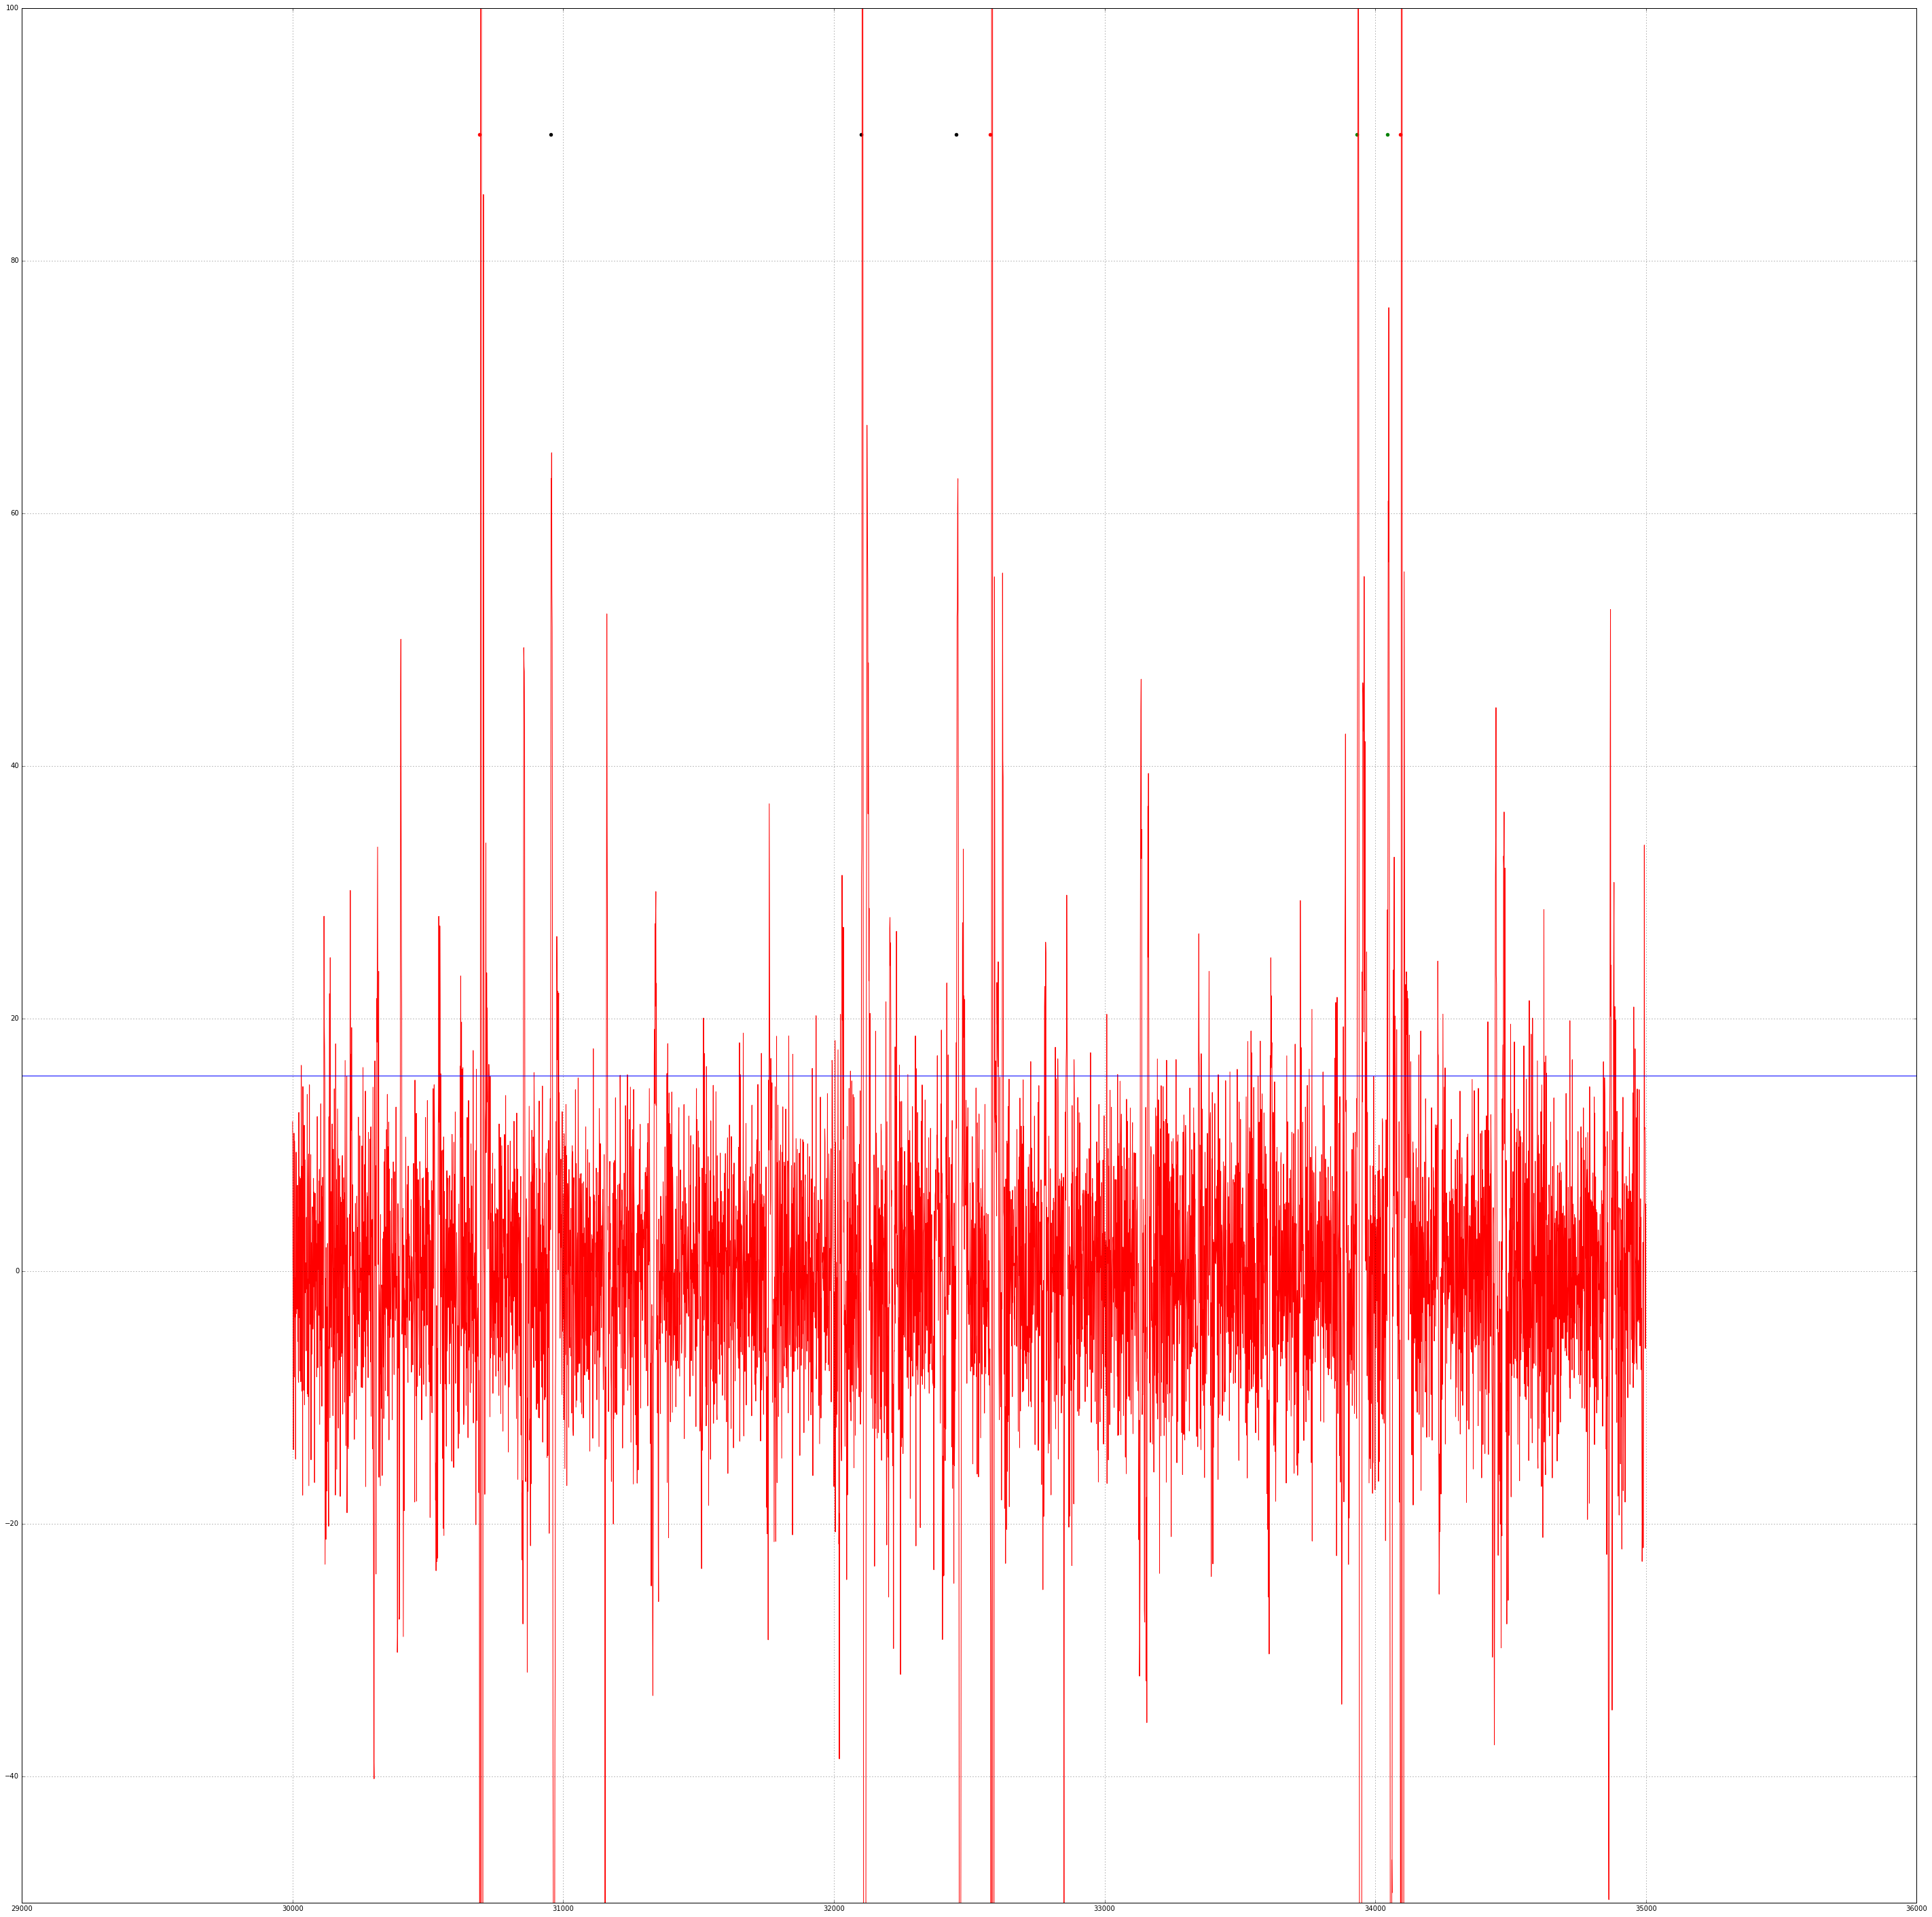

In [218]:
pp= np.empty((0))  
for i in range(0,40000):
    pp = np.append(pp,90)
plt.figure(figsize=(50,50))
plt.plot(X[30000:35000],Y[30000:35000], color='red')
#plt.plot(tt,P, 'go')
plt.scatter(template0,pp[0:3], marker='o',color='red')
plt.scatter(template1,pp[0:3], marker='o',color='black')
plt.scatter(template2,pp[0:2], marker='o',color='green')
plt.axhline(y=thres, color='b', linestyle='-')
plt.grid(True, which='both')
plt.ylim((-50,100))
plt.clim((30000,35000))

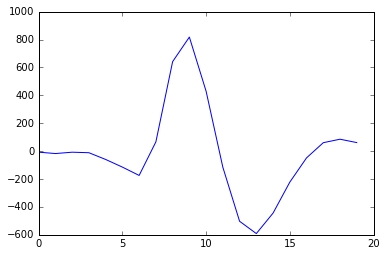

In [219]:

plt.plot(X[0:20],templates[0])

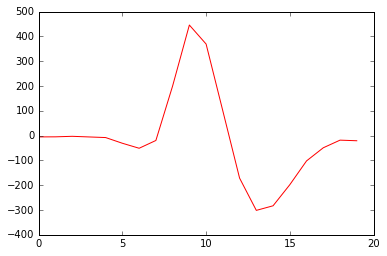

In [220]:
plt.plot(X[0:20],templates[1],color="red")

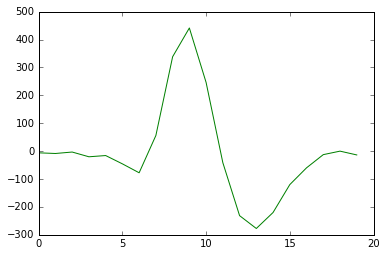

In [221]:
plt.plot(X[0:20],templates[2],color="green")

In [223]:
##starting the Kmeans algorithm

In [235]:
k = KMeans(n_clusters=2,random_state=0).fit(muap)

In [248]:
muaptocluster =  k.labels_
print muaptocluster 
template0=[]
template1=[]

[0 1 1 1 0 1 1 0]


In [250]:
for i in range(len(muaptocluster)):
    if muaptocluster[i] == 0:
        template0.append(A[i])
    else:
        template1.append(A[i])

        

hello
hello2
hi
hi2
hi
hi2
hi
hi2
hello
hello2
hi
hi2
hi
hi2
hello
hello2


In [252]:
print template0
print template1

[30691.0, 32578.0, 34092.0]
[30954.0, 32101.0, 32452.0, 33933.0, 34045.0]


In [257]:
clusters= k.cluster_centers_

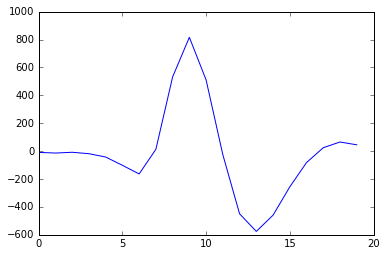

In [259]:
plt.plot(X[0:20],clusters[0])
#plt.plot(X[0:20],templates[2],color="green")   

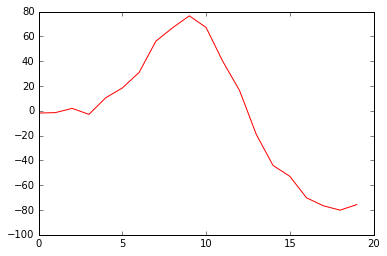

In [260]:
plt.plot(X[0:20],clusters[1],color="red")

(30000, 35000)

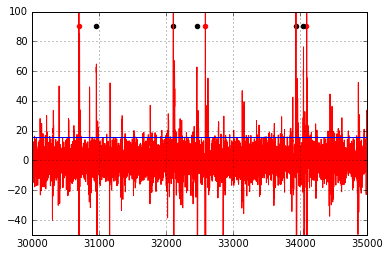

In [263]:
pp= np.empty((0))  
for i in range(0,40000):
    pp = np.append(pp,90)
#plt.figure(figsize=(50,50))
plt.plot(X[30000:35000],Y[30000:35000], color='red')
#plt.plot(tt,P, 'go')
plt.scatter(template0,pp[0:3], marker='o',color='red')
plt.scatter(template1,pp[0:5], marker='o',color='black')
#plt.scatter(template2,pp[0:2], marker='o',color='green')
plt.axhline(y=thres, color='b', linestyle='-')
plt.grid(True, which='both')
plt.ylim((-50,100))
plt.xlim((30000,35000))